# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

https://sites.google.com/site/timeserieschain/

In [9]:
# SETUP
import stumpy
import helper.testdata as testdata
import helper.visualize as visualize
import helper.results as results

## Web Query Data ##
A decade-long GoogleTrend query volume for the keyword Kohl’s, an American retail chain.

Ground Truth: Chains are the growing Importants of Cyber Monday. One bump according to stumpy tutorial ->  m = 20.

In [10]:
# SETUP
use_case = "chains"
data_name = "webquery"
T = testdata.load_from_csv("../data/" + use_case + "/" + data_name + ".csv")

### stumpy without dilation ###

In [11]:
# SETUP for stumpy without dilation
m = 20 # target for ABP
d = 1

file_name = data_name + "_d" + str(d) + "_m" + str(m)
file_path = "../results/" + use_case + "/" + data_name + "/" + file_name

In [12]:
# calculate:
mp = stumpy.stump(T, m=m)
all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])
results.save([T, m, d, mp, all_chain_set, unanchored_chain], file_path + ".npy")

 File already exists, not saving. 


/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/experiments_master_mp_dilation/usecases/helper/results.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array(np_arrays)


[ 35  87 139 244 296 400 452]


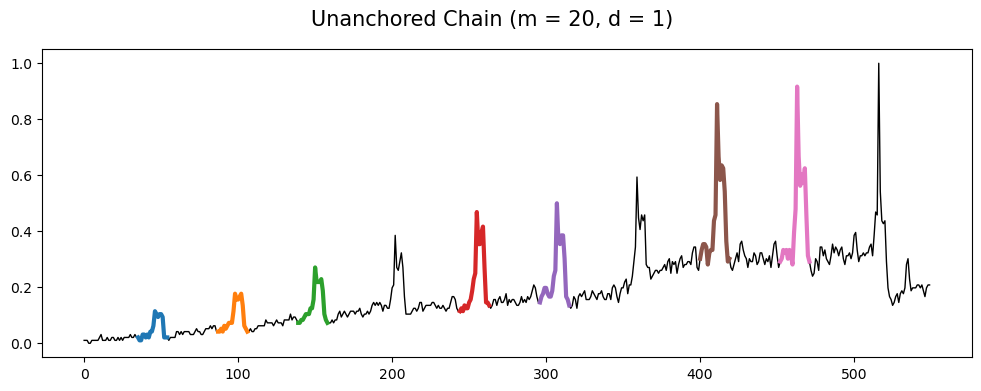

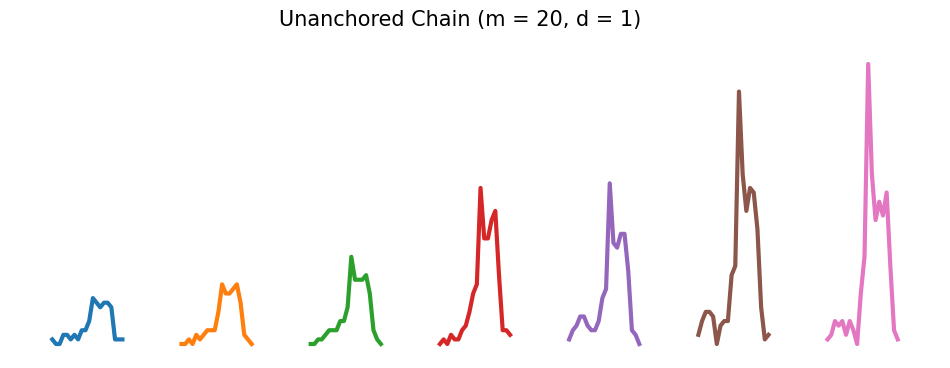

In [13]:
# visualize:
T, m, d, mp, all_chain_set, unanchored_chain = results.load(file_path + ".npy")
print(unanchored_chain)
plot = visualize.chain_unanchored(T, unanchored_chain, m, d)
plot.savefig(file_path + "_unanchored")
plot = visualize.chain_unanchored_snippets(T, unanchored_chain, m, d)
plot.savefig(file_path + "_unanchored_snippets")

### stumpy with dilation ###

In [14]:
# SETUP for stumpy with dilation
target_r = 20 # target for ABP
ds = [2,3,4,5,6,7,8]

In [15]:
# calculate
for d in ds:
    m = round((target_r-1)/d) + 1
    file_name = data_name + "_d" + str(d) + "_m" + str(m)
    file_path = "../results/"+ use_case + "/" + data_name + "/" + file_name

    mp = stumpy.stump_dil(T, m=m, d=d)
    all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])
    
    results.save([T, m, d, mp, all_chain_set, unanchored_chain], file_path + ".npy")

/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/stumpy_master_mp_dilation/stumpy/core.py:67: UserWarning: Excluding `['normalize', 'p']` parameters, function `stump_dil(['T_A', 'm', 'T_B', 'ignore_trivial', 'k', 'd']) and function `aamp(['T_A', 'm', 'T_B', 'ignore_trivial', 'k']) have different arguments/parameters.
  warnings.warn(msg)
/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/experiments_master_mp_dilation/usecases/helper/results.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array(np_arrays)


 File already exists, not saving. 
 File already exists, not saving. 
 File already exists, not saving. 
 File already exists, not saving. 
 File already exists, not saving. 
 File already exists, not saving. 
 File already exists, not saving. 


[134 239 291 343 395 447 500]
[  3  69 211 328 381]
[ 10  19 179 278 490]
[ 11  48 154 364]
[353 355 420 494 529]
[ 81 132 238 444 496]
[  5 125 221 229]


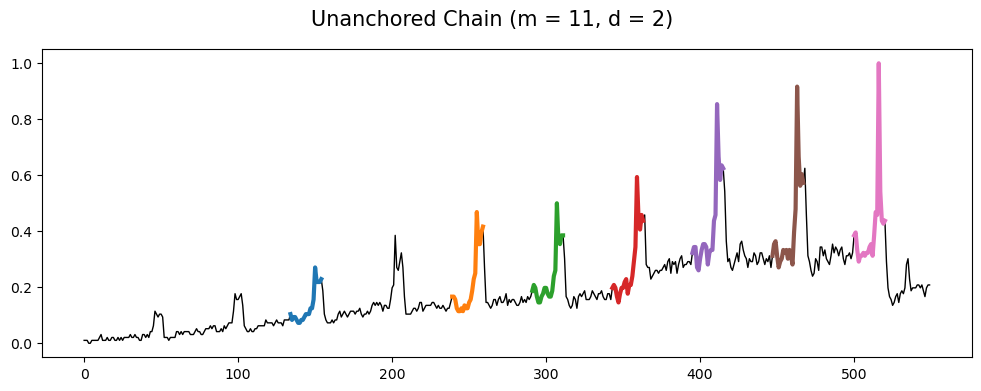

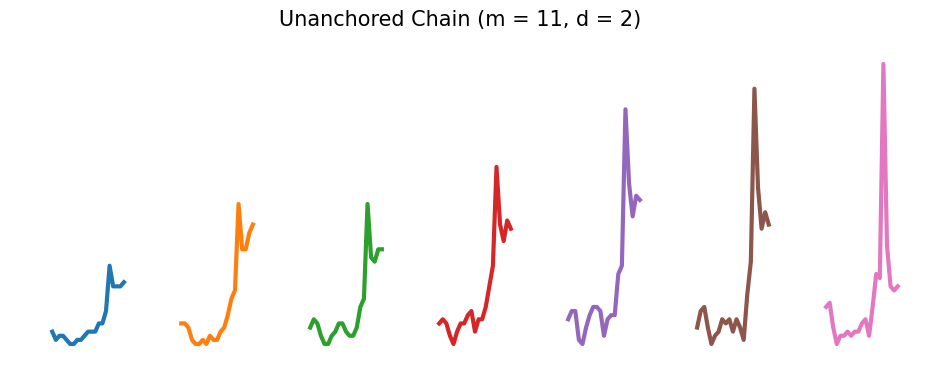

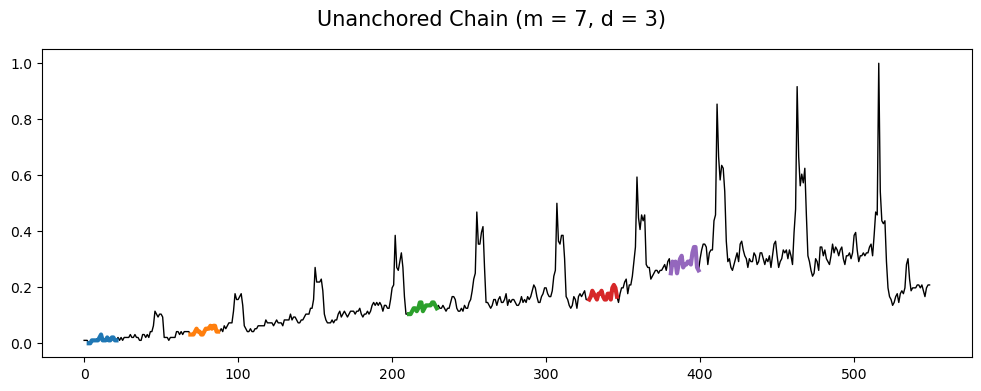

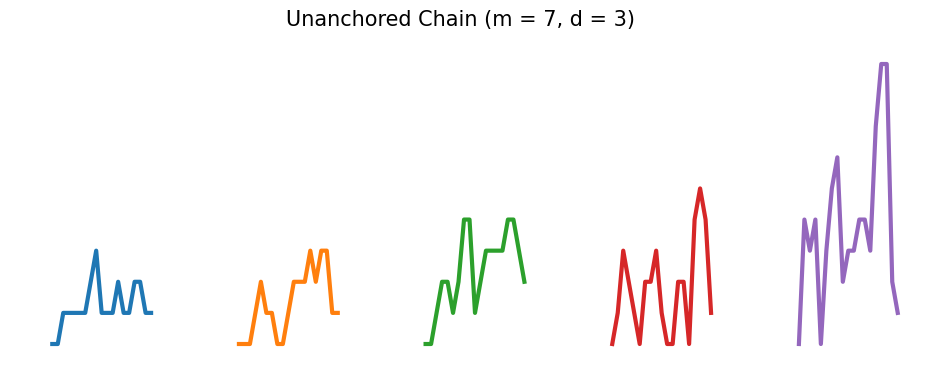

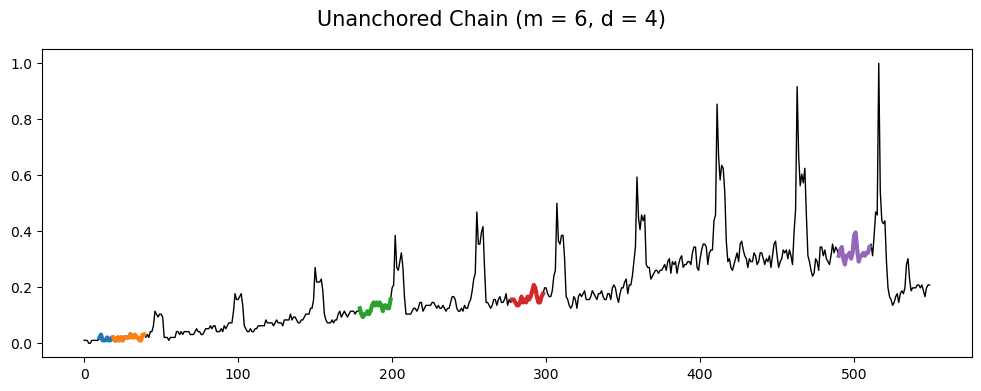

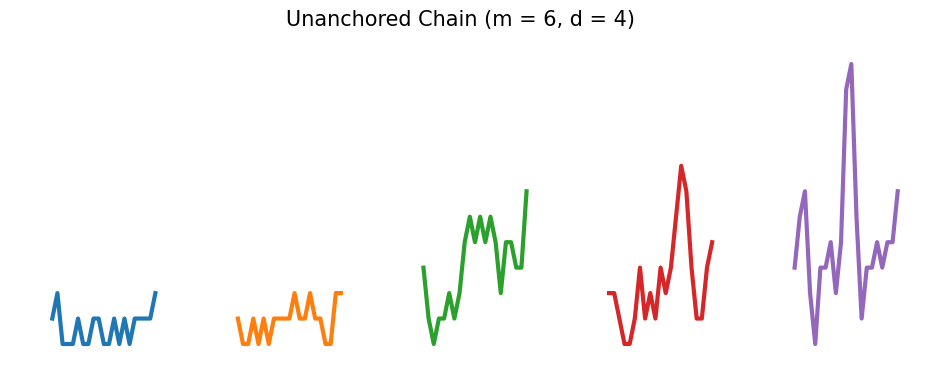

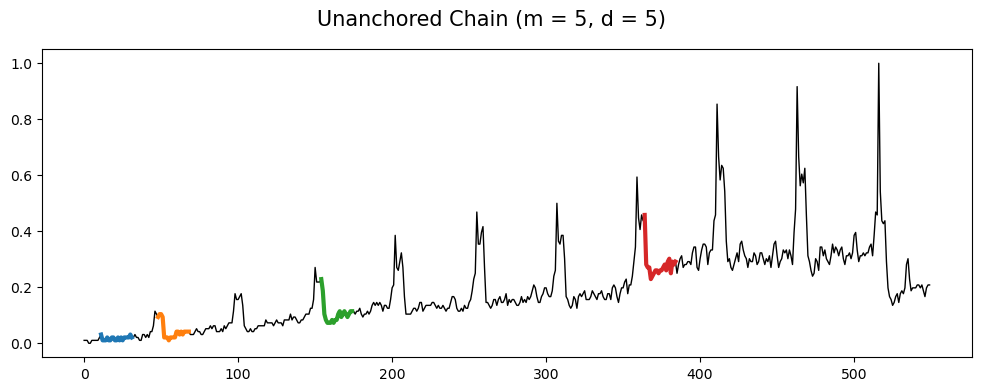

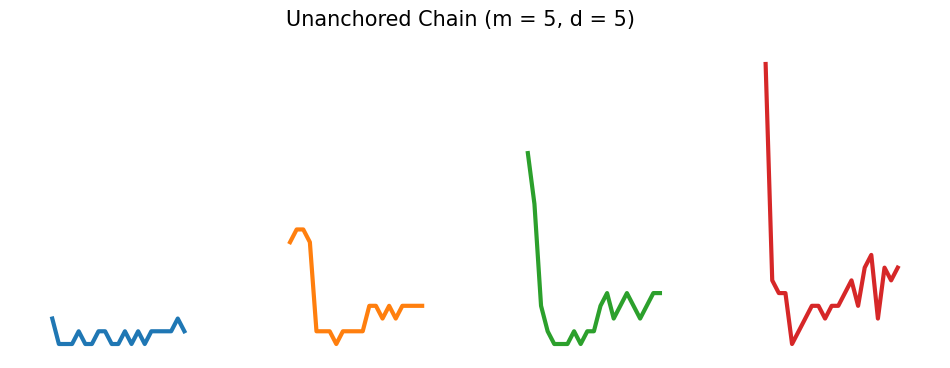

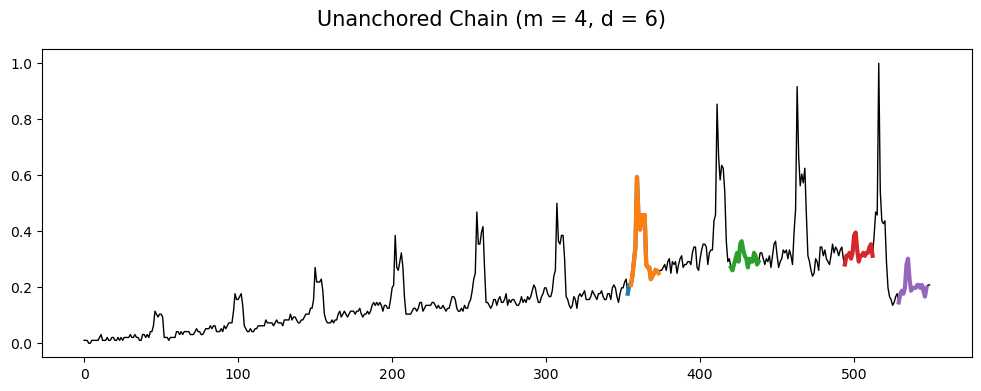

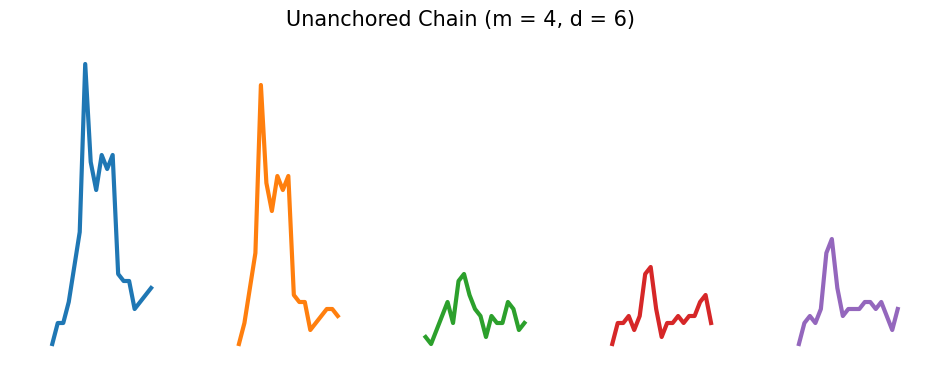

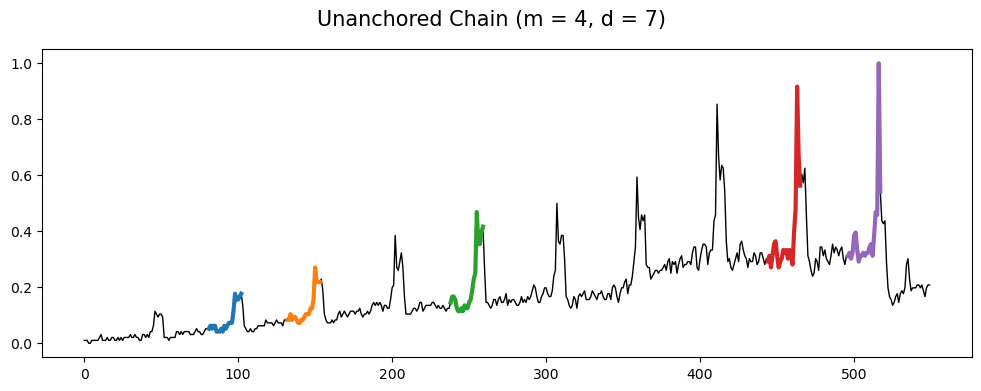

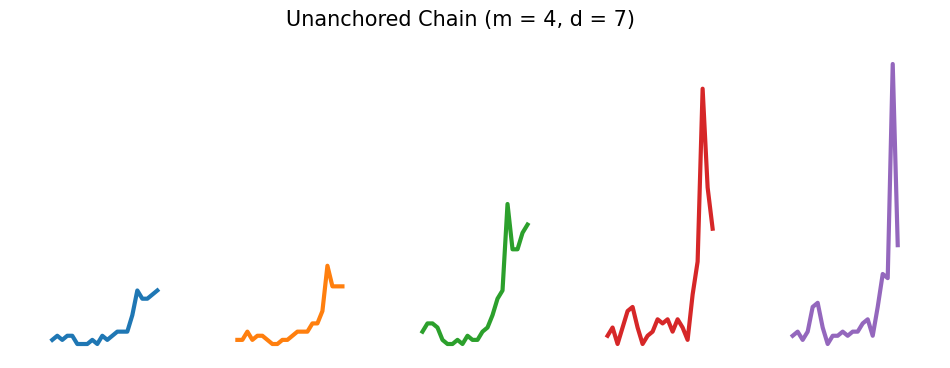

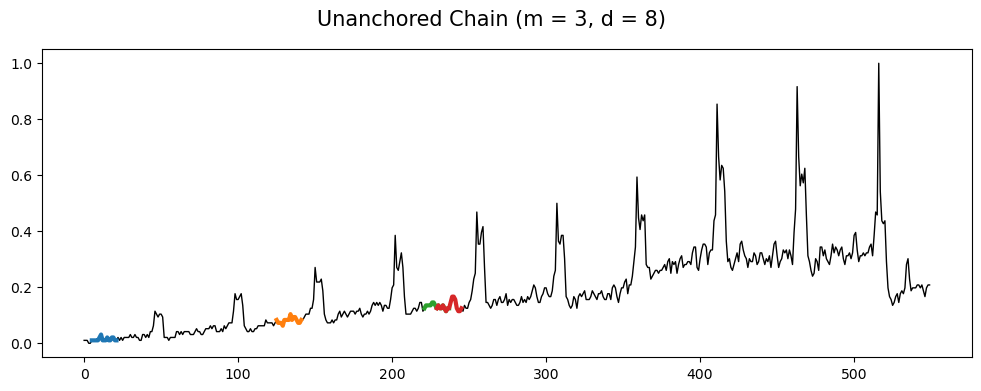

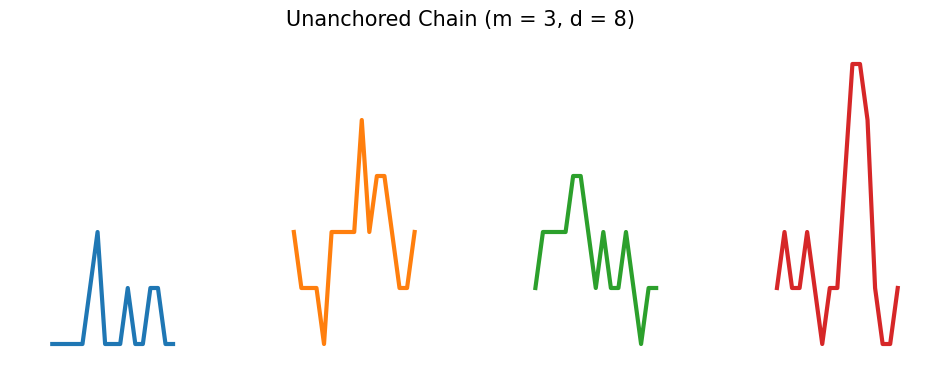

In [16]:
# visualize:
for d in ds:
    m = round((target_r-1)/d) + 1
    file_name = data_name + "_d" + str(d) + "_m" + str(m)
    file_path = "../results/" + use_case + "/" + data_name + "/" + file_name

    T, m, d, mp, all_chain_set, unanchored_chain = results.load(file_path + ".npy")
    
    print(unanchored_chain)
    plot = visualize.chain_unanchored(T, unanchored_chain, m, d)
    plot.savefig(file_path + "_unanchored")
    plot = visualize.chain_unanchored_snippets(T, unanchored_chain, m, d)
    plot.savefig(file_path + "_unanchored_snippets")